<a href="https://colab.research.google.com/github/ummd/ummd.github.io/blob/master/Assignment3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

## Question 14 from ISLR Ch 3.7

### a) **[3marks]**

$$Y=\beta_0+\beta_1 X_1 + \beta_2 X_2 + \epsilon$$

where the true values of the coefficients are:  $$\beta_0=2, \quad \beta_1=2,\quad \beta_2=0.3$$

In [ ]:
set.seed(1)
x1 = runif(100)
x2 = 0.5 * x1 + rnorm(100)/10
y = 2 + 2*x1 + 0.3*x2 + rnorm(100)

### b) **[2 marks]** , 1 each for correlation coeff and plot

In [ ]:
cor(x1, x2)

[1] 0.8351212

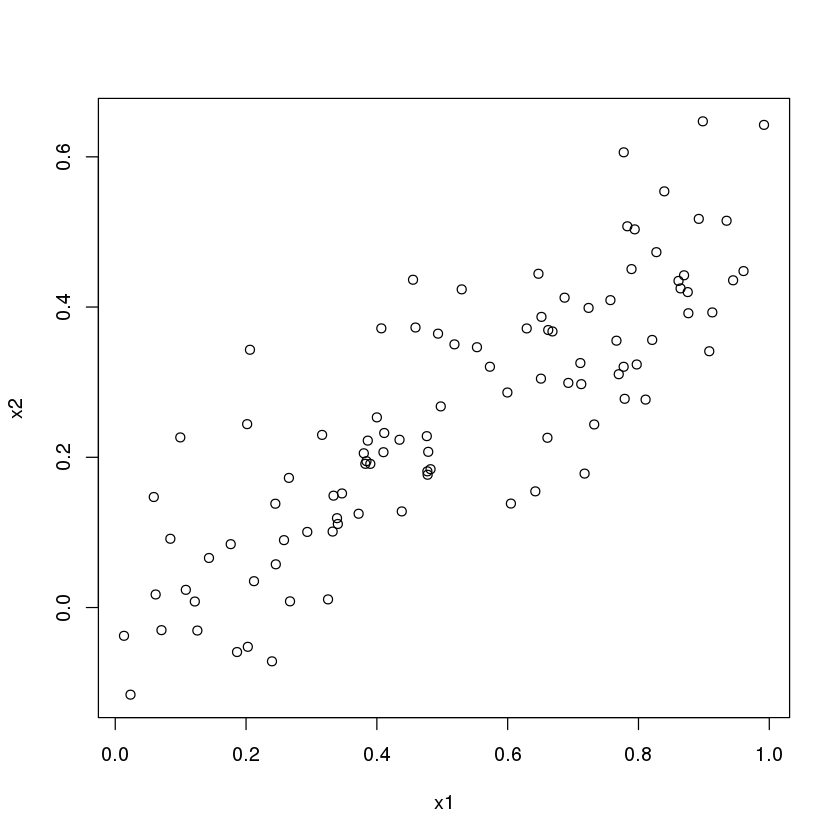

In [ ]:
plot(x1,x2)

In [ ]:
lm.fit = lm(y~x1+x2)
summary(lm.fit)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05


### c) **[3 marks]**

$$ \hat\beta_0=2.1305, \quad \hat\beta_1=1.4396, \quad \hat\beta_3=1.0097$$

The regression coefficients are close to the true coefficients, although with quite high standard errors because the regressors are highly correlated. We can not reject the null hypothesis that each coefficient is equal to its true value (see code below).

Since the coefficeints have such large standard errors, we can not confidantly conclude that $X_2$ has an effect on the response from this dataset (the p-value for $\hat\beat_1 is 0.3754). And the p-value for X_1 is barely significant (0.0487)


In [ ]:
null <- c(2,2,0.3) # defines the null hypothesis that each coefficient is its truw value
t <- (lm.fit$coef- null) / summary(lm.fit)$coef[,2] # calculates the test statistics for the null that the coefficient equals its true value
2*(1-pt(abs(t),100-3)) # p-values

(Intercept)          x1          x2 
  0.5748795   0.4389778   0.5328060

In [ ]:
#note that this calculation above calculates the test statistic for all three coefficients ath the same time. This is a shortcut that R allows. Tou could also calculate this:

t2 <- (lm.fit$coef[3]- null[3]) / summary(lm.fit)$coef[3,2]
2*(1-pt(abs(t2),100-3)) # p-values

# and this would calculate each by itself, and get the same answer

x2 
0.532806

### d) **3 marks**

The estimate is quite close to the true value, and we can reject that it is equal to zero (from the p-value)

In [ ]:
lm.fit = lm(y~x1)
summary(lm.fit)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06


### e) **3 marks**

The estimate is quite **far** from the true value, though we can reject that it is equal to zero (from the p-value)

In [ ]:
lm.fit = lm(y~x2)
summary(lm.fit)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05


### f) **3 marks**

Because $x_1$ and $x_2$ are correlated, the regrssion in c) suffers from collinearity. Since both regressors belong in the model ($\beta_1=2,\beta_2=0.3$), if we drop one of the regressors this will bias the estimate of the other. For example, this is why the estimate $\hat\beta_2$ from the model with only $X_2$ is far from its true value. 

In this sense, the results do not contradict each other, however if the analyst were only to run a model from d) and e) they might arrive at incorrect conclusions. In this special case in which one of the predictors was constructed from the other linearly, we can assess the degree of this bias.

### g) 3 marks

In c) and e) it is a high leverage point. Note that it even changes the statistical significance of the predictors. 

In d) it is an outlier